In [1]:
import sys
sys.path.insert(0, '../Diamond_Music') # you must have already obtained the Diamond_Music repo from github and put it in the right dir.
import diamond_music_utils as dmu
import adaptive_tuning_util as atu
import numpy as np

rng = np.random.default_rng()
import os
from importlib import reload
# from fractions import Fraction
# import muspy
# from mido import MidiFile
# from IPython.display import Audio, display
import music21 as m21
import logging
from itertools import count, combinations, permutations
import matplotlib.pyplot as plt
# some constants 

flats = True # set this to False if the key uses sharps.
keys = atu.set_accidentals(flats)
CSD_FILE = 'ball9.csd'
JUPYTER_LOG = 'ball9.log'
dmu.start_logger(JUPYTER_LOG)
CS_LOGNAME = 'ball9.log'
MIDI_DIR = '.' 
NUMPY_DIR = 'eval/numpy_chorales'
WAVE_DIR = '../../../Music/sflib'
m21.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore') # required for finding mscore
# Press 'Enter' to confirm your input or 'Escape' to cancel

In [2]:
import pprint as pp
voice_time = atu.init_voice_time()
pp.pprint(voice_time, sort_dicts=False)

{'fing1': {'full_name': 'finger piano 1',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 0,
           'volume_factor': 1,
           'min_oct': 2,
           'max_oct': 7},
 'fing2': {'full_name': 'finger piano 2',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 1,
           'volume_factor': 0,
           'min_oct': 2,
           'max_oct': 7},
 'fing3': {'full_name': 'finger piano 3',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 2,
           'volume_factor': 0,
           'min_oct': 2,
           'max_oct': 7},
 'bfin1': {'full_name': 'bass finger piano 1',
           'start': 0,
           'csound_voice': 24,
           'time_tracker_number': 3,
           'volume_factor': 0,
           'min_oct': 1,
           'max_oct': 5},
 'fing4': {'full_name': 'finger piano 4',
           'start': 0,
           'csound_voice': 1,
           'time_tracker_number': 4,
      

In [3]:
# List all the works available by Bach: 
paths = m21.corpus.getComposer('bach')
print(*paths, sep = '\n')

/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv1.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv10.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv101.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv102.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv103.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv104.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv108.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv11.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv110.7.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus/bach/bwv111.6.mxl
/home/prent/virtual_python3.11/lib/python3.11/site-packages/music21/corpus

In [4]:
version = "bwv245.14"
chorale, root, mode, s = atu.read_from_corpus(version)
print(f'{chorale.shape = }, {root = }, {mode = }')
sChords = s.chordify()
saved_chords = np.array([str(m.analyze('key')) for m in sChords.getElementsByClass('Measure')])      
print(*saved_chords,sep = '\n')

chorale.shape = (4, 256), root = 9, mode = 'major'
f# minor
D major
b minor
A major
A major
C# major
f# minor
f# minor
f# minor
A major
e minor
E major
f# minor
b minor
A major
A major


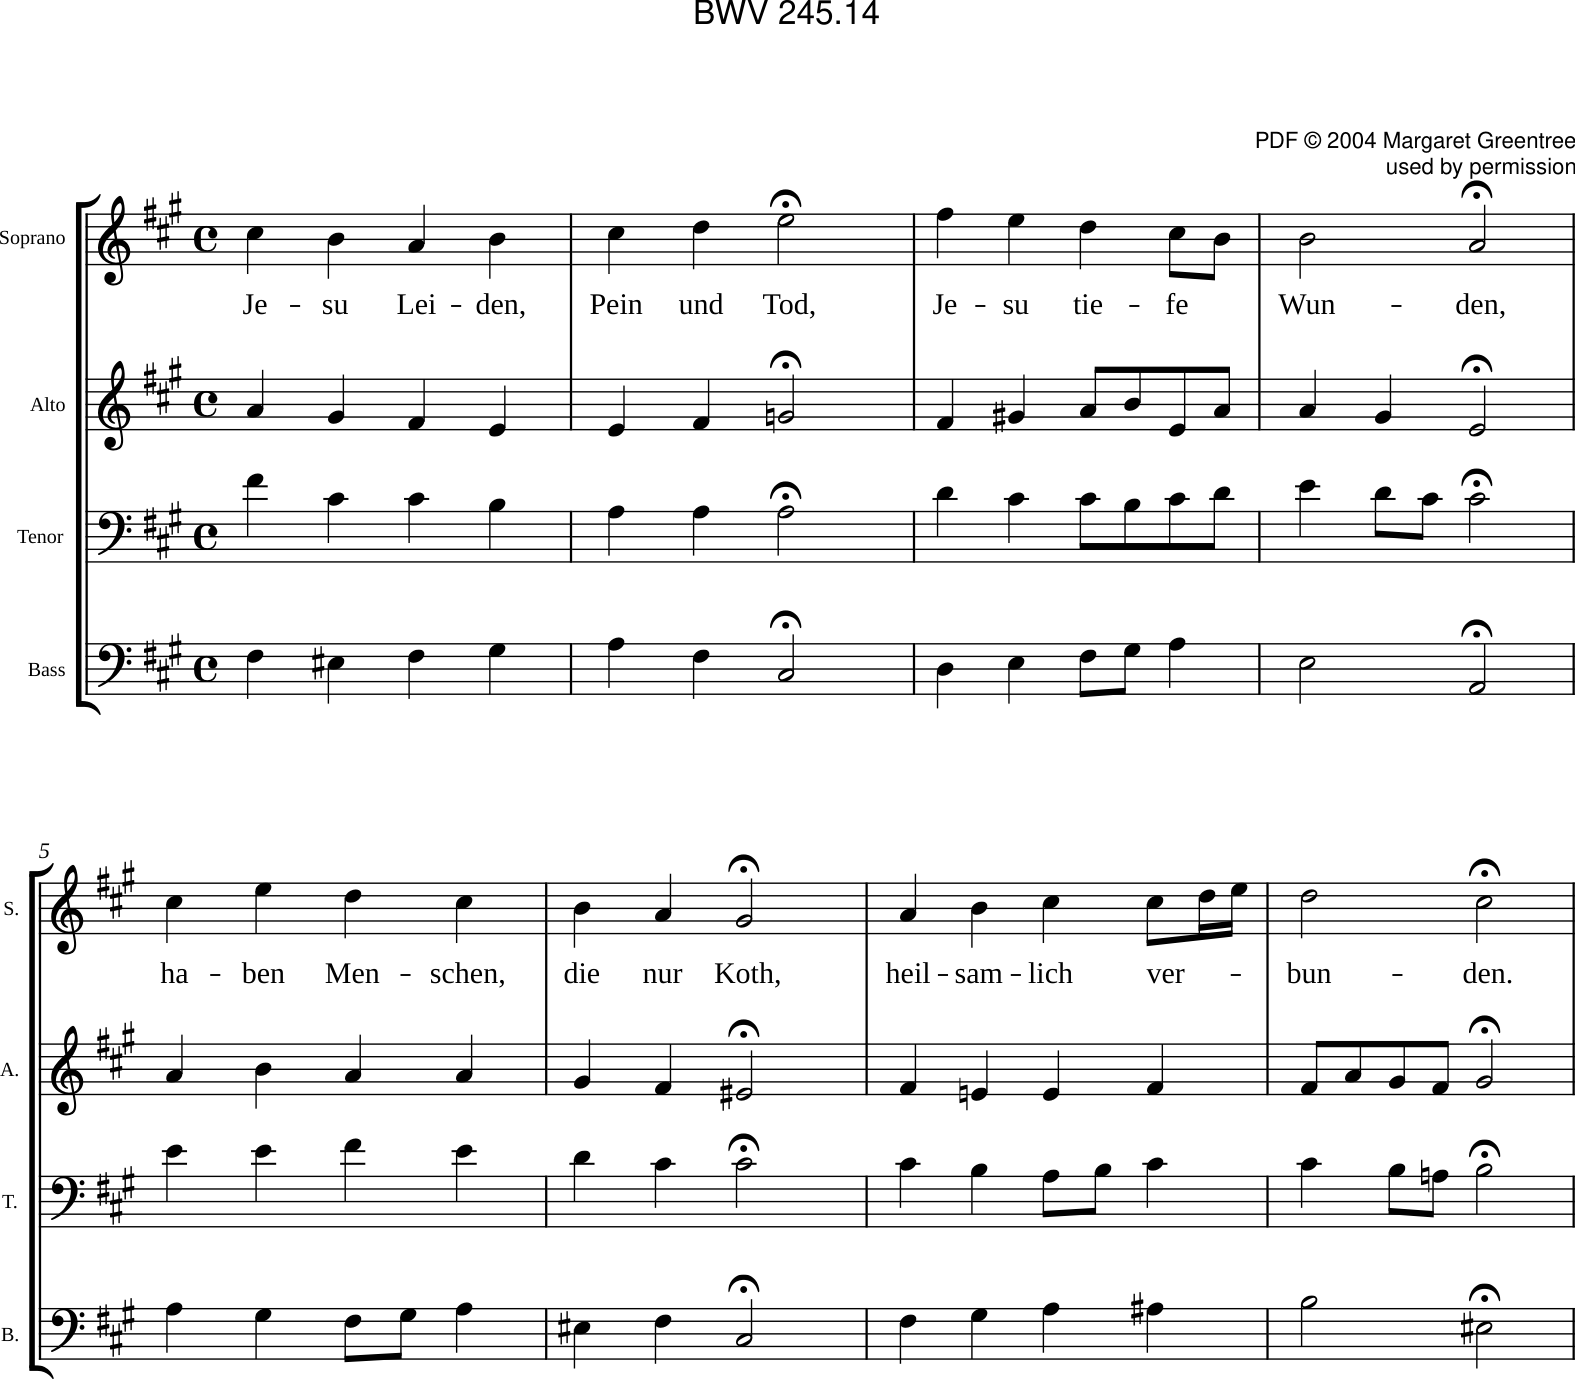

'bwv245.14'

In [56]:
s.show()
s.write("midi", version)

In [57]:
# This cell is just for solving problems with troublesome chords with high scores
# 88 		['G♯', 'F♮', 'C♯', 'C♯']	[786 502  84  84]	(0, 1, 284, '33/28') (0, 2, 702, '3/2') (0, 3, 702, '3/2') (1, 2, 418, '14/11') (1, 3, 418, '14/11') (2, 3, 0, '1')		1084.0
# 170 		['D♯', 'A♮', 'F♯', 'G♮']	[316 898 583 694]	(0, 1, 582, '7/5') (0, 2, 267, '7/6') (0, 3, 378, '51/41') (1, 2, 315, '6/5') (1, 3, 204, '9/8') (2, 3, 111, '16/15')		1093.0
# 214 		['B♮', 'E♮', 'A♯', 'F♯']	[1102  400 1003  604]	(0, 1, 702, '3/2') (0, 2, 99, '18/17') (0, 3, 498, '4/3') (1, 2, 603, '17/12') (1, 3, 204, '9/8') (2, 3, 399, '34/27')		154.0
# 230 		['D♮', 'F♮', 'A♮', 'C♮']	[196 512 898  14]	(0, 1, 316, '6/5') (0, 2, 702, '3/2') (0, 3, 182, '10/9') (1, 2, 386, '5/4') (1, 3, 498, '4/3') (2, 3, 884, '5/3')		59.0
# chord_num = 230
# chord_number = 164 improved the chord. chord_1200 = array([1102, 1102,  400,  786]), score = 41.0
reload(atu)
reload(dmu)
dmu.start_logger('testing.log', log_level = 'debug')
print(f'{chorale.shape = }, {keys[root] = }, {mode = }')
order_of_compares = np.array([[0,1], [1,2], [2,3], [3,0], [0,2], [0,3], [1,3], [1,0], [2,0], [3,1], [2,1], [3,2]])
# print(f'{keys = }')
# top_notes is built later in the notebook from the source MIDI file
top_notes = np.array([[   9,    4,    1,   11,    6,    8],
       [ 898,  400,   84, 1102,  582,  786]])
print(f'{top_notes = }')
tonal_diamond = atu.build_tonal_diamond(31)
print(f'{tonal_diamond.shape = }')
# pick a subset of chords to test on
start_at =  164
end_at =  start_at + 1
print(f'{start_at = }, {end_at = }')
new_chorale = chorale[:, start_at:end_at] # np.array([60 + 2, 60 + 8, 60 + 4, 60 + 6]) # chorale[:, start_at:end_at]
# new_chorale = np.array([0, 4, 7, 10]) + 60
print(f'{keys[new_chorale.T % 12] = }')
initial_chord = new_chorale.T[0]
print(f'{initial_chord = }, {initial_chord % 12 = }')
chord_number = 0
dist_factor = .25
ratio_factor =  4 

stop_when = 36
original_12 = np.arange(0, 1200, 100)
chord_1200, score = atu.improve_chord_rolls(initial_chord, top_notes, chord_number - 1, tonal_diamond, dist_factor = dist_factor, ratio_factor = ratio_factor, stop_when = stop_when, flats = flats, original_12 = original_12)
print(f'{chord_1200 = }, {[int(round(note / 100,0) % 12) for note in chord_1200] = }, {score = }')
print(*[(inx1, inx2, abs(chord_1200[inx1] - chord_1200[inx2]), dmu.cents_to_ratio(abs(chord_1200[inx1] - chord_1200[inx2]),limit_denominator = 55)) for inx1, inx2 in order_of_compares], end = '\t\t')

chorale.shape = (4, 256), keys[root] = 'A♮', mode = 'major'
top_notes = array([[   9,    4,    1,   11,    6,    8],
       [ 898,  400,   84, 1102,  582,  786]])
tonal_diamond.shape = (214, 3)
start_at = 164, end_at = 165
keys[new_chorale.T % 12] = array([['C♮', 'B♮', 'E♮', 'A♭']], dtype='<U2')
initial_chord = array([ 0, 71, 64, 56]), initial_chord % 12 = array([ 0, 11,  4,  8])
chord_1200 = array([   7, 1025,  323,  821]), [int(round(note / 100,0) % 12) for note in chord_1200] = [0, 10, 3, 8], score = 67.0
(0, 1, 1018, '9/5') (1, 2, 702, '3/2') (2, 3, 498, '4/3') (3, 0, 814, '8/5') (0, 2, 316, '6/5') (0, 3, 814, '8/5') (1, 3, 204, '9/8') (1, 0, 1018, '9/5') (2, 0, 316, '6/5') (3, 1, 204, '9/8') (2, 1, 702, '3/2') (3, 2, 498, '4/3')		

In [58]:
# This illustrates how to sort the cache of notes, should that ever be necessary. It's only around 59 entries, with only 3 cache hits in total. Pretty miserable way to spend a weekend.
# print(f'{chord_cache.shape = }') # chord_cache.shape = (9, 8)
# chord_cache = chord_cache[chord_cache[:,3].argsort()] # First sort doesn't need to be stable. from the least significant to the most significant columns:
# chord_cache = chord_cache[chord_cache[:,2].argsort(kind='mergesort')]
# chord_cache = chord_cache[chord_cache[:,1].argsort(kind='mergesort')]
# chord_cache = chord_cache[chord_cache[:,0].argsort(kind='mergesort')]
# print(f'{chord_cache = }')

In [59]:
def finger_piano_part(chorale, repeats, voice_names, voice_time, tpq, density):
      logging.debug(f'in finger_piano_part. {chorale.shape = }, {repeats = }, {voice_names = }')
      voices = voice_names.shape[0] # if you want it to last twice as long, make twice as many voices: voice_names.shape[0] * 2, or increase the value of repeats
      chorale = np.repeat(chorale, repeats, axis = 1) # make each note repeats times as long
      logging.debug(f'after repeating each note {repeats = }: {chorale.shape = }')
      chorale = np.repeat(chorale, voices // 4, axis = 0)
      logging.debug(f'after doubling voices: {chorale.shape = }')
      logging.debug(f'{chorale.shape = }')
      # revised volume_array into a density function 5/21/23
      print(f'{density = }')
      sustain = 8
      volume_array = dmu.build_density_function(density, chorale.shape[1] // (repeats * sustain))
      volume_array = np.clip(np.repeat(volume_array, repeats * sustain, axis = 0),0,10)
      # revised 3/22/23 

      # revise 4/7/23 to move build_notes_features earlier in the stack.
      logging.debug(f'{chorale.shape = }') # all must be the same shape, (2,2), (3,2) etc. 
      gls = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
      gls_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      ups = np.array([[-1, 0], [0, 1], [1, 2], [-2, -1]])
      ups_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      env = np.array([[1, 0], [2, 8], [16, 17,], [2, 8]])
      env_p = np.array([[.5, .5], [.8, .2], [.5, .5], [.7, .3] ])
      vel = np.array([[71, 74], [74, 77], [75, 78], [73, 76]])
      vel_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      guev_array = np.stack((gls, gls_p, ups, ups_p, env, env_p, vel, vel_p), axis = 0)
      rng.shuffle(guev_array, axis=2)
      logging.debug(f'In finger piano. feature array after stack. {guev_array.shape = }') # guev_array.shape = (8, 3, 2)
      # determine values for gliss, upsample, envelope, and velocity arrays
      notes_features_6 = atu.add_features(chorale, guev_array)
      logging.debug([np.unique(feature, return_counts=True) for feature in notes_features_6])
      octave_array = notes_features_6[1] # all the octaves for all the voices, notes
      # create an array to mask some notes so that octave = 0, which makes them silent
      probs = [[.2, .8],[.01,.99], [.3, .7],[.4,.6],] # from mostly ones, to half and half Note: p = [.01, .99] makes a very sparce collection of held notes.
      density_function = np.array([rng.choice(2, size = (voices, (repeats // 2) - 1), p = prob) for prob in probs]).reshape(8, -1) # This will be used over and over again throughout the piece.
      logging.debug(f'after first creation: {density_function.shape = }') # (8,24)
      density_function = np.concatenate((np.ones((voices, 1), dtype = int), density_function), axis = 1) # (8,25)
      logging.debug(f'after adding ones to first beat: {density_function.shape = }')
      density_function = np.tile(density_function, chorale.shape[1] // density_function.shape[1] + 1)
      logging.debug(f'{octave_array.shape = }, {density_function.shape = }') # octave_array.shape = (8, 6480), density_function.shape = (8, 6500)
      # changed on 5/21/23 - make sure it doesn't mess up the octaves as zeros
      octave_alteration_mask = atu.build_octave_alteration_mask(repeats, voices, chorale, octave_reduce = 3) # I'm worried this will send some to 0, which will make them silent.
      logging.debug('octave_alteration_mask buckets: values, counts')
      logging.debug([np.unique(octave, return_counts=True) for octave in octave_alteration_mask])
      logging.debug(f'{octave_alteration_mask.shape = }')
      logging.debug('octave_array prior to spread (values, counts): ')
      logging.debug([np.unique(octave, return_counts=True) for octave in octave_array])
      for voice in np.arange(octave_array.shape[0]):
            for note in np.arange(octave_array.shape[1]):
                  if octave_array[voice, note] > 0: octave_array[voice, note] += octave_alteration_mask[voice, note]
      octave_array = octave_array * density_function[:, :octave_array.shape[1]] # make the octave go to zero for some percent of the notes
      velocity_array = notes_features_6[5]
      for voice in voice_names: # for each voice, "fing1", "fing2", etc.
            logging.debug(f'before boosting: {np.max(velocity_array) = }')
            velocity_array += voice_time[voice]["volume_factor"] # add the voice_time["volume"] to the velocity. Each voice adds a different value based on voice_time dictionary
            logging.debug(f'after boosting: {np.max(velocity_array) = }')
            logging.debug(f'before clipping the octave: {np.max(octave_array) = }')
            octave_zero = np.where(octave_array == 0, 0, 1) # save the locations of all the zeros in the octaves array in a new array called octave_zero, which has zeros where the octaves were zero and ones where some other number is located.
            octave_array = np.clip(octave_array, voice_time[voice]["min_oct"], voice_time[voice]["max_oct"]) # clip to the min_oct through max_oct values from the voice_time dictionary
            octave_array = octave_array * octave_zero # multiply the octaves array by the octave_zero array to restore the zeros that were clipped away
            logging.debug(f'after clipping the octave: {np.max(octave_array) = }')
      notes_features_6[1] = octave_array
      notes_features_6[5] = velocity_array
      logging.debug('octaves after spread (values, counts): ')
      logging.debug([np.unique(octave, return_counts=True) for octave in octave_array])
      logging.debug(f'{notes_features_6.shape = }')
      notes_features_15 = dmu.piano_roll_to_notes_features(notes_features_6, volume_array, voice_names, tpq, voice_time)
      logging.info(f'{notes_features_15.shape = }')
      return notes_features_15

In [60]:
def woodwinds_part(chorale, repeats, voice_names, voice_time, tpq, density, mask = True):
      # wood_winds, voice_time, tpq
      logging.debug(f'in woodwinds_part. {chorale.shape = }, {repeats = }, {voice_names = }')
      voices = voice_names.shape[0] # if you want it to last twice as long, pretend there are twice as many voices: voice_names.shape[0] * 2
      chorale = np.repeat(chorale, repeats, axis = 1) # make each note repeats times as long
      logging.debug(f'after repeating each note {repeats = }: {chorale.shape = }')
      chorale = np.repeat(chorale, voices // 4, axis = 0)
      logging.debug(f'after doubling voices: {chorale.shape = }')
      logging.debug(f'{chorale.shape = }') # (4, 256)
      
      print(f'{density = }')
      sustain = 8
      volume_array = dmu.build_density_function(density, chorale.shape[1] // (repeats * sustain))
      volume_array = np.clip(np.repeat(volume_array, repeats * sustain, axis = 0),0,10)
      # revised 3/22/23 revised again 5/21/23 to give more control over relative volume of each instrument
      # revised 4/6/23 to move midi_to_notes_octaves earlier in the stack
      
      logging.debug(f'{chorale.shape = }') # all must be the same shape, (2,2), (3,3) etc. square only allowed
      gls = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
      gls_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      ups = np.array([[2, 1],[3, 2],[1, 2],[0, 1]])
      ups_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      env = np.array([[1, 16], [6, 9], [0, 5], [9, 6]])
      env_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      vel = np.array([[64, 66], [64, 69], [63, 70], [64, 69]]) # how loud the note will be at different points in the piece across all voices.
      vel_p = np.array([[.5, .5], [.5, .5], [.5, .5], [.5, .5]])
      
      if mask:
            guev_array = np.stack((gls, gls_p, ups, ups_p, env, env_p, vel, vel_p), axis = 0)
            rng.shuffle(guev_array, axis=2)
      else: guev_array = np.stack((gls[0], gls_p[0], ups[0], ups_p[0], env[0], env_p[0], vel[0], vel_p[0]), axis = 0).reshape(8,1,2) 
      logging.debug(f'In woodwinds. feature array after stack. {guev_array.shape = }') # guev_array.shape = (8, 3, 2)
      # determine values for gliss, upsample, envelope, and velocity arrays
      notes_features_6 = atu.add_features(chorale, guev_array)
      logging.debug(f'feature values and counts in this order: notes, octaves, gliss, upsample, envelope, velocity (values, counts)')
      logging.debug([np.unique(feature, return_counts=True) for feature in notes_features_6])
      logging.debug(f'{notes_features_6.shape = }') # notes_features_6.shape = (8, 915, 6) (voices, notes, features)
      if mask:
            octave_array = notes_features_6[1] # all the octaves for all the voices, notes
            octave_alteration_mask = atu.build_octave_alteration_mask(repeats, voices, chorale, octave_reduce = 3)
            logging.debug(f'octave_alteration_mask buckets')
            logging.debug([np.unique(octave, return_counts=True) for octave in octave_alteration_mask])
            logging.debug(f'{octave_alteration_mask.shape = }')
            logging.debug(f'octave_array prior to spread: ')
            logging.debug([np.unique(octave, return_counts=True) for octave in octave_array])
            # you don't want to add a number to an octave that is already zero. It's zero because the note was zero
            for voice in np.arange(octave_array.shape[0]):
                  for note in np.arange(octave_array.shape[1]):
                        if octave_array[voice, note] > 0: octave_array[voice, note] += octave_alteration_mask[voice, note]
            
            octave_silence_mask = atu.build_long_mask(repeats, voices, chorale) 
            logging.debug(f'{octave_array.shape = }, {octave_silence_mask.shape = }') 
            octave_array = octave_array * octave_silence_mask
            velocity_array = notes_features_6[5]
            for voice in voice_names: # for each voice, "fing1", "fing2", etc.
                  logging.debug(f'before boosting: {np.max(velocity_array) = }')
                  logging.debug(f'{velocity_array[0,:4] = }, {voice_time[voice]["volume_factor"] = }')
                  velocity_array += voice_time[voice]["volume_factor"] # add the voice_time["volume"] to the velocity. Each voice adds a different value based on voice_time dictionary
                  logging.debug(f'after boosting: {np.max(velocity_array) = }, {velocity_array[0,:4] = }')
                  logging.debug(f'before clipping the octave: {np.max(octave_array) = }')
                  octave_zero = np.where(octave_array == 0, 0, 1) # save the locations of all the zeros in the octaves array in a new array called octave_zero, which has zeros where the octaves were zero and ones where some other number is located.
                  octave_array = np.clip(octave_array, voice_time[voice]["min_oct"], voice_time[voice]["max_oct"]) # clip to the min_oct through max_oct values from the voice_time dictionary
                  octave_array = octave_array * octave_zero # multiply the octaves array by the octave_zero array to restore the zeros that were clipped away
                  logging.debug(f'after clipping the octave: {np.max(octave_array) = }')
            notes_features_6[1] = octave_array
            notes_features_6[5] = velocity_array
      logging.debug(f'{notes_features_6.shape = }')
      notes_features_15 = dmu.piano_roll_to_notes_features(notes_features_6, volume_array, voice_names, tpq, voice_time)
      logging.info(f'{notes_features_15.shape = }')
      return notes_features_15
# end of woodwinds_part

## Start here to build the chorale
### This is the main note generating module

In [61]:
# reload(atu)
# reload(dmu)
# tonal_diamond_31 = atu.build_tonal_diamond(31)
dmu.start_logger(JUPYTER_LOG)
version = "bwv245.14"
print(f'{version = }')
chorale, root, mode, s = atu.read_from_corpus(version) # Was mein Gott will, das g'scheh allzeit: What my God wants should always happen
if mode == 'minor':
    if root in ([2,7,0,5,10,3]): # minor keys notated with flats d, g, c, f, bb, eb
        keys = atu.set_accidentals(True) # True = flats False = sharps
    else: keys = atu.set_accidentals(False) 
else:    
    if root in ([7,2,9,4,11,6]): # major keys notated with sharps" G D A E B, F#
        keys = atu.set_accidentals(False) # True = flats False = sharps
    else: keys = atu.set_accidentals(True) 
print(f'{chorale.shape = }, {keys[root] = }, {mode = }')
# chorale = chorale[:,80:136] # if you want only some notes [102, 132, 140, 141]
# chorale = np.array([[0, 7, 4, 0], [9, 4, 0, 9], [2, 9, 5, 2], [7, 7, 2, 11],[0, 7, 4, 0]]).T + 60 # keenan comma pump
print(f'sliced chorale: {chorale.shape = }')
print(f'you should have successfully read the corpus into a numpy array by this point.')
voice_time = atu.init_voice_time()
logging.debug(f'average midi number for each voice (SATB): {[round(np.average(voice),2) for voice in chorale] = }') # sanity check
repeats = 12
# remember to come back here and uncomment this next line that creates an exteded duration ending
chorale = np.concatenate((chorale, np.repeat(chorale[:,-1], repeats, axis = 0).reshape(4, repeats)), axis = 1) # add a bit at the end so you make sure you have a nice bunch of repeated chords at the end. Fade out later
# initialize the instrument arrays
dmu.init_voice_start_times(voice_time) # start from the begining - set all instruments to start at time zero
stored_gliss = dmu.init_stored_gliss() # resets the global glissando array and the global current_gliss_table variable to 800
# Instruments to use in csound
finger_pianos = np.array(['fing1', 'fing2', 'fing3', 'bfin1', 'fing4', 'fing5', 'fing6', 'bfin2'])
wood_winds = np.array(["flut1", "oboe1", "frnh1", "basn1", "clar1", "oboe2", "frnh2",  "basn2"])
pizz_strings = np.array(["vlip1", "vlip2", "vlap1", "celp1", "vlip3", "vlip4", "vlap2", "celp2"]) # martele "vlim1", "vlim2", "vlam1", "celm1"
bowed_strings = np.array(["vliv1", "vliv2", "vlav1", "celv1", "vliv3", "vliv4",  "vlav2", "celv2"])
brass_section = np.array(["trmp1", "trmp2", "trmb1", "tuba1", "trmp3", "trmp4", "trmb2", "tuba2"])
perc_guitar = np.array(["xylp1", "mari1", "vibp1", "harp1", "bgui1", "ebss1", "stri1", "long1"])
# Choose the notes that you would like to anchor in place and not allow to drift
unique_note_names, count_of_note_names = np.unique(np.array([voice % 12 for voice in chorale]), return_counts=True)
print(f'all notes used in this MIDI file: {unique_note_names}\nNames of the notes: {keys[unique_note_names]}\nHow often each not appears in the chorale: {count_of_note_names}')
top_number_of_notes = 6 # how many notes do you want in top_notes to anchor and prevent drifting
top_notes = unique_note_names[count_of_note_names.argsort()[-top_number_of_notes:]] # choose the number of notes at the end of the list, the most common.
print(f'Use some of these to anchor key notes by transposing chords: {top_number_of_notes} most used in the chorale, last is the most used: ')
chord_in_cents = atu.note_to_1200_edo(top_notes + 60) # must get them into higher octaves or the 0 will be assumed to be silence and turned into a -1
print(f'default cent values for top_notes before tuning from 5th to 1st most used: {chord_in_cents = }.')
top_notes = np.stack((top_notes, chord_in_cents), axis = 0) # adding default cent values for the notes: array([ 100,  400,  200, 1100,  600])
# here are the top_notes that I care about
top_notes = np.flip(top_notes, axis = 1) # flip the array so that the most used note is first
print(f'{top_notes.shape = }\n{top_notes = }')
print(f'{keys[top_notes[0] % 12]}')


version = 'bwv245.14'
chorale.shape = (4, 256), keys[root] = 'A♮', mode = 'major'
sliced chorale: chorale.shape = (4, 256)
you should have successfully read the corpus into a numpy array by this point.
all notes used in this MIDI file: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Names of the notes: ['C♮' 'C♯' 'D♮' 'D♯' 'E♮' 'F♮' 'F♯' 'G♮' 'G♯' 'A♮' 'A♯' 'B♮']
How often each not appears in the chorale: [ 20 175  71  10 182  24 118  26  86 196  14 150]
Use some of these to anchor key notes by transposing chords: 6 most used in the chorale, last is the most used: 
default cent values for top_notes before tuning from 5th to 1st most used: chord_in_cents = array([ 800,  600, 1100,  100,  400,  900]).
top_notes.shape = (2, 6)
top_notes = array([[   9,    4,    1,   11,    6,    8],
       [ 900,  400,  100, 1100,  600,  800]])
['A♮' 'E♮' 'C♯' 'B♮' 'F♯' 'G♯']


## Select the notes that you don't want to move around
### Anchor up to six notes in place.
<p>Choose these carefully so they don't cause conflicts between them. The algorithm will transpose any chord that has the anchor notes to the specified cent value, starting with the first one in the array, and continuing to the later ones if one of the first one's aren't found. </p>
<p>My recommendation is to start with just one anchor note, the root key of the piece. For example, of the root key is A, then pick midi note 9 at 900 cents. They run the whole notebook to completion and listen to the results. Take a look at the reports that are created to see what the most common cent values are. The notebook will automatically find the most common midi values, but not the cent values that the algorithm will tend to choose. Those will be obvious from the report at the end of the notebook.</p>
<p>Replace these default cent values with ones that make sense in this key. For example, you might find that the most common cent values are 900, 86, and 594 for A, C#, F#. Use those to populate the top_notes array, then run the algorithm to completion again. See if there are other cent values that appear more often, and include those in the top_notes array. I usually found that six notes is the maximum I could anchor. No additional anchor notes would ever have an effect. </p>
To limit to just the first of the top notes, use this code
<code>
top_notes = top_notes[:, :1]
</code>
After running the algorithm several times, and gradually anchoring more notes you will end up with a top_notes array like this:
<code>
top_notes[1] = np.array([900, 402, 86, 1104, 584, 788]) # choose the most commonly used cent values. Come back and refine over time.
</code>


In [62]:
# top_notes = top_notes[:, :1]
print(f'{top_notes.shape = }, {top_notes = }')
# for example: f# minor, D major, b minor, A major, C# major, f# minor, A major, e minor, E major, f# minor, b minor, A major
print(f'{top_notes.shape = }\n{top_notes = }')
# reload(atu)
# this is where the cent values are determined for all the chords in the chorale
dist_factor = 1
ratio_factor = 1
stop_when = 25 # stop the roll process if you get a score this low
flats = False # set the list of 12 notes to either sharps or flats, can't be both.
min_score_perm = 100 # this is the minimum score allowed from improve_chord_rolls. If higher, send to try_permutations. If you set this very low, it always goes to try_permutations
limit_max = 31 # have not had success with changing this
original_12 = np.arange(0, 1200, 100) # I tried carefully choosing this, but it had bad effects.
tonal_diamond = np.array(atu.build_tonal_diamond(limit_max))
print(f'{tonal_diamond.shape = }')  # (213, 3)
# here is where we convert midi notes to cents:
chorale_in_cents = atu.midi_to_notes_octaves(chorale, top_notes, tonal_diamond, ratio_factor = ratio_factor, dist_factor = dist_factor, stop_when = stop_when, flats = flats, min_score_perm = min_score_perm, original_12 = original_12)
logging.debug(f'in main line. {chorale_in_cents.shape = }')

top_notes.shape = (2, 6), top_notes = array([[   9,    4,    1,   11,    6,    8],
       [ 900,  400,  100, 1100,  600,  800]])
top_notes.shape = (2, 6)
top_notes = array([[   9,    4,    1,   11,    6,    8],
       [ 900,  400,  100, 1100,  600,  800]])
tonal_diamond.shape = (214, 3)


In [63]:
np.save(version, chorale_in_cents)

In [64]:
# report the results in text form
# reload(dmu)
# print(f'{chorale_in_cents.shape = }')
# print(f'{[chord for chord in chorale_in_cents[:,:1,0].T]}')
end_chord = 999
max_score = 0
report_over = 0 
sum_scores = 0
count_scores = 0
limit_denominator = 42 # seems to work pretty well for 42 to 48. 
print(f'report the chords used, with chord scores')
print(f'#\t\tnames of the notes\tcents of notes\t\tintervals between notes, the cents and ratios of the intervals\t\tchord score')
previous_chord = np.zeros((4,), dtype = int)

for chord_num, chord_1200, octaves, midi_notes in zip(count(0,1), chorale_in_cents[:,:end_chord,0].T, chorale_in_cents[:,:end_chord,1].T, chorale.T):
    # chorale_in_cents[:,:end_chord,0].T , chorale_in_cents[:,:end_chord,1].T
    # print(f'{chord_num = }, {chord_1200 = }, {octaves = }, {midi_notes = }')

    chord_12_rounded = np.array([int(round(note / 100, 0) % 12) + (octv * 12) for (note, octv) in zip(chord_1200, octaves)]) # convert the cent value back into the original MIDI numbers
    if not np.array_equal(midi_notes, chord_12_rounded): # compare the chord from the MIDI file to the chord in cents, which has been moved a lot. Make sure you have the same 12 TET note.
        delta = np.argmax(np.abs(np.diff(np.array([chord_12_rounded, midi_notes]), n=1, axis=0))) # where is the difference located
        if octaves[delta] == 0: pass #  0 in the octave in this column means this note will never be played in send_to_csound_file
        else: 
            print(f'mismatch between the original MIDI notes {chord_num = }, {midi_notes = }, {chord_12_rounded =  }')
            print(f'Original scale degrees: {midi_notes % 12 = }, Scale degrees derived from the cent values: {chord_12_rounded % 12 = }')
            print(f'{keys[midi_notes % 12] = }')
            print(f'{chord_12_rounded[delta] = }, {midi_notes[delta] = }, {chord_1200 = }')
                           
    if not np.array_equal(chord_12_rounded, previous_chord):
        current_score = atu.score_chord_cents(chord_1200, tonal_diamond, ratio_factor = ratio_factor) # shouldn't the score include the distance from 12TET?
        max_score = np.max((current_score, max_score))
        sum_scores += current_score
        count_scores += 1
        if current_score > report_over:
            print(chord_num, '\t', end = '\t') # chord_12_rounded % 12, 
            print([keys[int(round(note, 0) % 12)] for note in chord_12_rounded], end = '\t')
            print(chord_1200, end = '\t')
            print(*[(inx1, inx2, abs(chord_1200[inx1] - chord_1200[inx2]), dmu.cents_to_ratio(abs(chord_1200[inx1] - chord_1200[inx2]),limit_denominator = limit_denominator)) for inx1, inx2 in combinations(np.arange(4),2)], end = '\t\t')
            print(f'{current_score}')   
        
    previous_chord = chord_12_rounded

print(f'{version = }') 
print(f'Maximum score was: {max_score = }')  
print(f'Total score was {sum_scores}') 
print(f'Average score was: {round(sum_scores / count_scores,1)}') 
print(f'{ratio_factor = }, {dist_factor = }') 
print(f'{keys[top_notes[0]] = }') 
print(f'in cents: {top_notes[1] = }')
value, counts = np.unique(chorale_in_cents[:,:,0].T, return_counts = True)
how_many_notes = 20
print(f'{how_many_notes} most common cent values, midi note, counts with the most common at the bottom:')
print(*[(v, int(round(v / 100,0)), c) for v,c in zip(value[np.argsort(counts)[-how_many_notes:]], counts[np.argsort(counts)[-how_many_notes:]])], sep = '\n')
value = np.unique(chorale_in_cents[:,:,0].T)
 

report the chords used, with chord scores
#		names of the notes	cents of notes		intervals between notes, the cents and ratios of the intervals		chord score
0 		['C♯', 'A♮', 'F♯', 'F♯']	[ 86 900 584 584]	(0, 1, 814, '8/5') (0, 2, 498, '4/3') (0, 3, 498, '4/3') (1, 2, 316, '6/5') (1, 3, 316, '6/5') (2, 3, 0, '1')		49.0
4 		['B♮', 'G♯', 'C♯', 'F♮']	[1069  802  100  486]	(0, 1, 267, '7/6') (0, 2, 969, '7/4') (0, 3, 583, '7/5') (1, 2, 702, '3/2') (1, 3, 316, '6/5') (2, 3, 386, '5/4')		61.0
8 		['A♮', 'F♯', 'C♯', 'F♯']	[914 598 100 598]	(0, 1, 316, '6/5') (0, 2, 814, '8/5') (0, 3, 316, '6/5') (1, 2, 498, '4/3') (1, 3, 0, '1') (2, 3, 498, '4/3')		49.0
12 		['B♮', 'E♮', 'B♮', 'G♯']	[1102  400 1102  786]	(0, 1, 702, '3/2') (0, 2, 0, '1') (0, 3, 316, '6/5') (1, 2, 702, '3/2') (1, 3, 386, '5/4') (2, 3, 316, '6/5')		41.0
16 		['C♯', 'C♯', 'E♮', 'A♮']	[ 84  84 400 898]	(0, 1, 0, '1') (0, 2, 316, '6/5') (0, 3, 814, '8/5') (1, 2, 316, '6/5') (1, 3, 814, '8/5') (2, 3, 498, '4/3')		55.0
20 		['D♮', 'F♯

In [65]:
# send the arrays to csound to make sounds
tempo = 84
tpq = 0.25
mask = True
wood = True
fing = True
notes_features_15 = np.empty((0,15), dtype = int) # start with an empty array you can concatenate onto.
density_function = np.array([
                  [7,7,1,3,1,1,1,4,6],  # finger_pianos  0
                  [6,1,1,5,0,5,5,4,5],  # wood_winds     1
                  [0,0,4,1,6,6,1,4,5],  # pizz_strings   2   
                  [0,0,0,0,6,1,1,4,6],  # bowed_strings  3
                  [0,6,6,1,0,1,0,4,7],  # brass          4
                  [0,1,4,7,0,0,7,4,7]]) # perc_guitar  5
print(f'{[np.sum(vol) for vol in density_function.T] = }')
if fing:
    notes_features_15 = np.concatenate((notes_features_15, finger_piano_part(chorale_in_cents, repeats, finger_pianos, voice_time, tpq, density_function[0])), axis = 0)
    notes_features_15 = np.concatenate((notes_features_15, finger_piano_part(chorale_in_cents, repeats, perc_guitar, voice_time, tpq, density_function[5])), axis = 0)
    notes_features_15 = np.concatenate((notes_features_15, finger_piano_part(chorale_in_cents, repeats, pizz_strings, voice_time, tpq, density_function[2])), axis = 0)
   
if wood:
    notes_features_15 = np.concatenate((notes_features_15, woodwinds_part(chorale_in_cents, repeats, brass_section, voice_time, tpq, density_function[4], mask = mask)), axis = 0)
    notes_features_15 = np.concatenate((notes_features_15, woodwinds_part(chorale_in_cents, repeats, bowed_strings, voice_time, tpq, density_function[3], mask = mask)), axis = 0)
    notes_features_15 = np.concatenate((notes_features_15, woodwinds_part(chorale_in_cents, repeats, wood_winds, voice_time, tpq, density_function[1], mask = mask)), axis = 0)
# now that you have the voices, assign note start times from durations of notes in a voice
notes_features_final, voice_time = dmu.fix_start_times(notes_features_15, voice_time)
logging.debug(f'{notes_features_final.shape = }')
# print out the duration of each voice by voice
print("finger_pianos: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in finger_pianos if voice_time[inst]["start"] > 0],sep='\t')
print("wood_winds: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in wood_winds if voice_time[inst]["start"] > 0],sep='\t')
print("pizz_strings: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in pizz_strings if voice_time[inst]["start"] > 0],sep='\t')
print("bowed_strings: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in bowed_strings if voice_time[inst]["start"] > 0],sep='\t')
print("perc_guitar: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in perc_guitar if voice_time[inst]["start"] > 0],sep='\t')
print("brass_section: ", *[(inst, dmu.format_seconds_to_minutes((voice_time[inst]["start"] * 60) / tempo + 3)) for inst in brass_section if voice_time[inst]["start"] > 0],sep='\t')
limit = 60 * 45 # only send the first xxx seconds to csound just to see if it's in the right universe of possiblilities. zero means no limit 60 * 45 is 45 minutes
notes_features = dmu.send_to_csound_file(notes_features_final, voice_time, CSD_FILE, tempos = 't0 ' + str(tempo), limit = limit, tempo = tempo, print_only = 25) 
seconds_fp = voice_time[finger_pianos[0]]["start"] # how many seconds will it take to play the piece
seconds_wd = voice_time[wood_winds[0]]["start"]
seconds_ps = voice_time[pizz_strings[0]]["start"]
seconds_bs = voice_time[bowed_strings[0]]["start"]
duration = round(np.max((seconds_fp, seconds_wd, seconds_ps, seconds_bs)) * 60 / tempo + 6,0)
print(f'duration in seconds: {duration}')

[np.sum(vol) for vol in density_function.T] = [13, 15, 16, 17, 13, 14, 15, 24, 36]
density = array([7, 7, 1, 3, 1, 1, 1, 4, 6])
density = array([0, 1, 4, 7, 0, 0, 7, 4, 7])
density = array([0, 0, 4, 1, 6, 6, 1, 4, 5])
density = array([0, 6, 6, 1, 0, 1, 0, 4, 7])
density = array([0, 0, 0, 0, 6, 1, 1, 4, 6])
density = array([6, 1, 1, 5, 0, 5, 5, 4, 5])
finger_pianos: 	('fing1', '00:09:28.714')	('fing2', '00:09:28.714')	('fing3', '00:09:28.714')	('bfin1', '00:09:28.714')	('fing4', '00:09:28.714')	('fing5', '00:09:28.714')	('fing6', '00:09:28.714')	('bfin2', '00:09:28.714')
wood_winds: 	('flut1', '00:09:28.714')	('oboe1', '00:09:28.714')	('frnh1', '00:09:28.714')	('basn1', '00:09:28.714')	('clar1', '00:09:28.714')	('oboe2', '00:09:28.714')	('frnh2', '00:09:28.714')	('basn2', '00:09:28.714')
pizz_strings: 	('vlip1', '00:09:28.714')	('vlip2', '00:09:28.714')	('vlap1', '00:09:28.714')	('celp1', '00:09:28.714')	('vlip3', '00:09:28.714')	('vlip4', '00:09:28.714')	('vlap2', '00:09:28.714')	('cel

In [66]:
csound = True
play = False
ship = False
if csound:
    logging.debug(f'logging csound output to csound_{CS_LOGNAME}')
    result = os.system(f'csound new_output.csd -Ocsound_{CS_LOGNAME}') # give it a log file to write csound messages to.
    result = os.system(f"grep 'invalid|replacing|range|error|cannot|rtevent|overall' -E csound_{CS_LOGNAME}") # inspect the log for important information
if play: result = os.system(f'play ../../../Music/sflib/ball8.wav')
if ship: 
    os.system(f'scp ../../../Music/sflib/ball8.wav prent@192.168.68.57:~/Music/sflib')
    os.system(f'scp ../../../Music/sflib/ball8.eps prent@192.168.68.57:~/Music/sflib')

upsample tried to move sample out of range of available samples. originally 1211 requested 1212
upsample tried to move sample out of range of available samples. originally 656 requested 655
upsample tried to move sample out of range of available samples. originally 634 requested 633
upsample tried to move sample out of range of available samples. originally 929 requested 930
upsample tried to move sample out of range of available samples. originally 656 requested 655
upsample tried to move sample out of range of available samples. originally 656 requested 655
upsample tried to move sample out of range of available samples. originally 849 requested 851
upsample tried to move sample out of range of available samples. originally 634 requested 633
upsample tried to move sample out of range of available samples. originally 656 requested 655
upsample tried to move sample out of range of available samples. originally 634 requested 633
upsample tried to move sample out of range of available sa

In [67]:
print(f'{version = }')
trim = True
version = version + "b"

if trim:
    os.system(f"sed -i 's/1600/{duration}/' ball9c.csd") # change the duration field in the csound convolution operation to the length in seconds of the wave file.
    result = os.system(f'sh trim.sh ball9 {version}') # carry out the tasks in trim.sh, which include the convolution csound operation, and a sox trimming of the resulting wave file. 
    os.system(f"sed -i 's/{duration}/1600/' ball9c.csd") # change it back to what it was previously after you finishe the trim.sh operation
else: print(f'Please note that you set {trim = } which means it will not be convolved.') 

version = 'bwv245.14'
../../../Music/sflib
total 8.8G
-rw-r--r--. 1 prent prent  12M May 24 09:26 ball9.eps
-rw-r--r--. 1 prent prent 143M May 24 09:26 ball9.wav
-rw-r--r--. 1 prent prent 191M May 24 08:51 ball9-tbwv245.14g.wav
-rw-r--r--. 1 prent prent 145M May 24 08:51 ball9a-c.wav
-rw-r--r--. 1 prent prent 191M May 24 08:02 ball9-tbwv245.14f.wav
-rw-r--r--. 1 prent prent 191M May 24 07:57 ball9-tbwv245.14e.wav
-rw-r--r--. 1 prent prent 191M May 24 07:50 ball9-tbwv245.14d.wav
-rw-r--r--. 1 prent prent 191M May 24 05:42 ball9-tbwv245.14c.wav
-rw-r--r--. 1 prent prent 191M May 23 16:37 ball9-tbwv245.14b.wav


export SFDIR="../../../Music/sflib"
echo $SFDIR
ls $SFDIR -lth | head -n 10
csound -U sndinfo $SFDIR/"$1".wav
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
util sndinfo:
../../../Music/sflib/ball9.wav:
	srate 44100, stereo, 24 bit WAV, 565.894 seconds
	(24955945 sample frames)
end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance
Elapsed time at end of performance: real: 0.000s, CPU: 0.000s
csound "$1"c.csd 
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Jan 19 2023
[commit: none]
libsndfile-1.1.0
UnifiedCSD:  ball9c.csd
STARTING FILE
Creating options
Creating orchestra
closing tag
Creating score
rtaudio: pulseaudio module enabled
rtmidi: ALSA Raw MIDI module enabled
sorting score ...
	... done
graphics suppressed, ascii substituted
0dBFS level = 32768.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 1536-byte blks of 24bit ints to ../../../M

density_function.shape = (6, 9)
density = array([7, 7, 1, 3, 1, 1, 1, 4, 6])
volume_array.shape = (2560,)


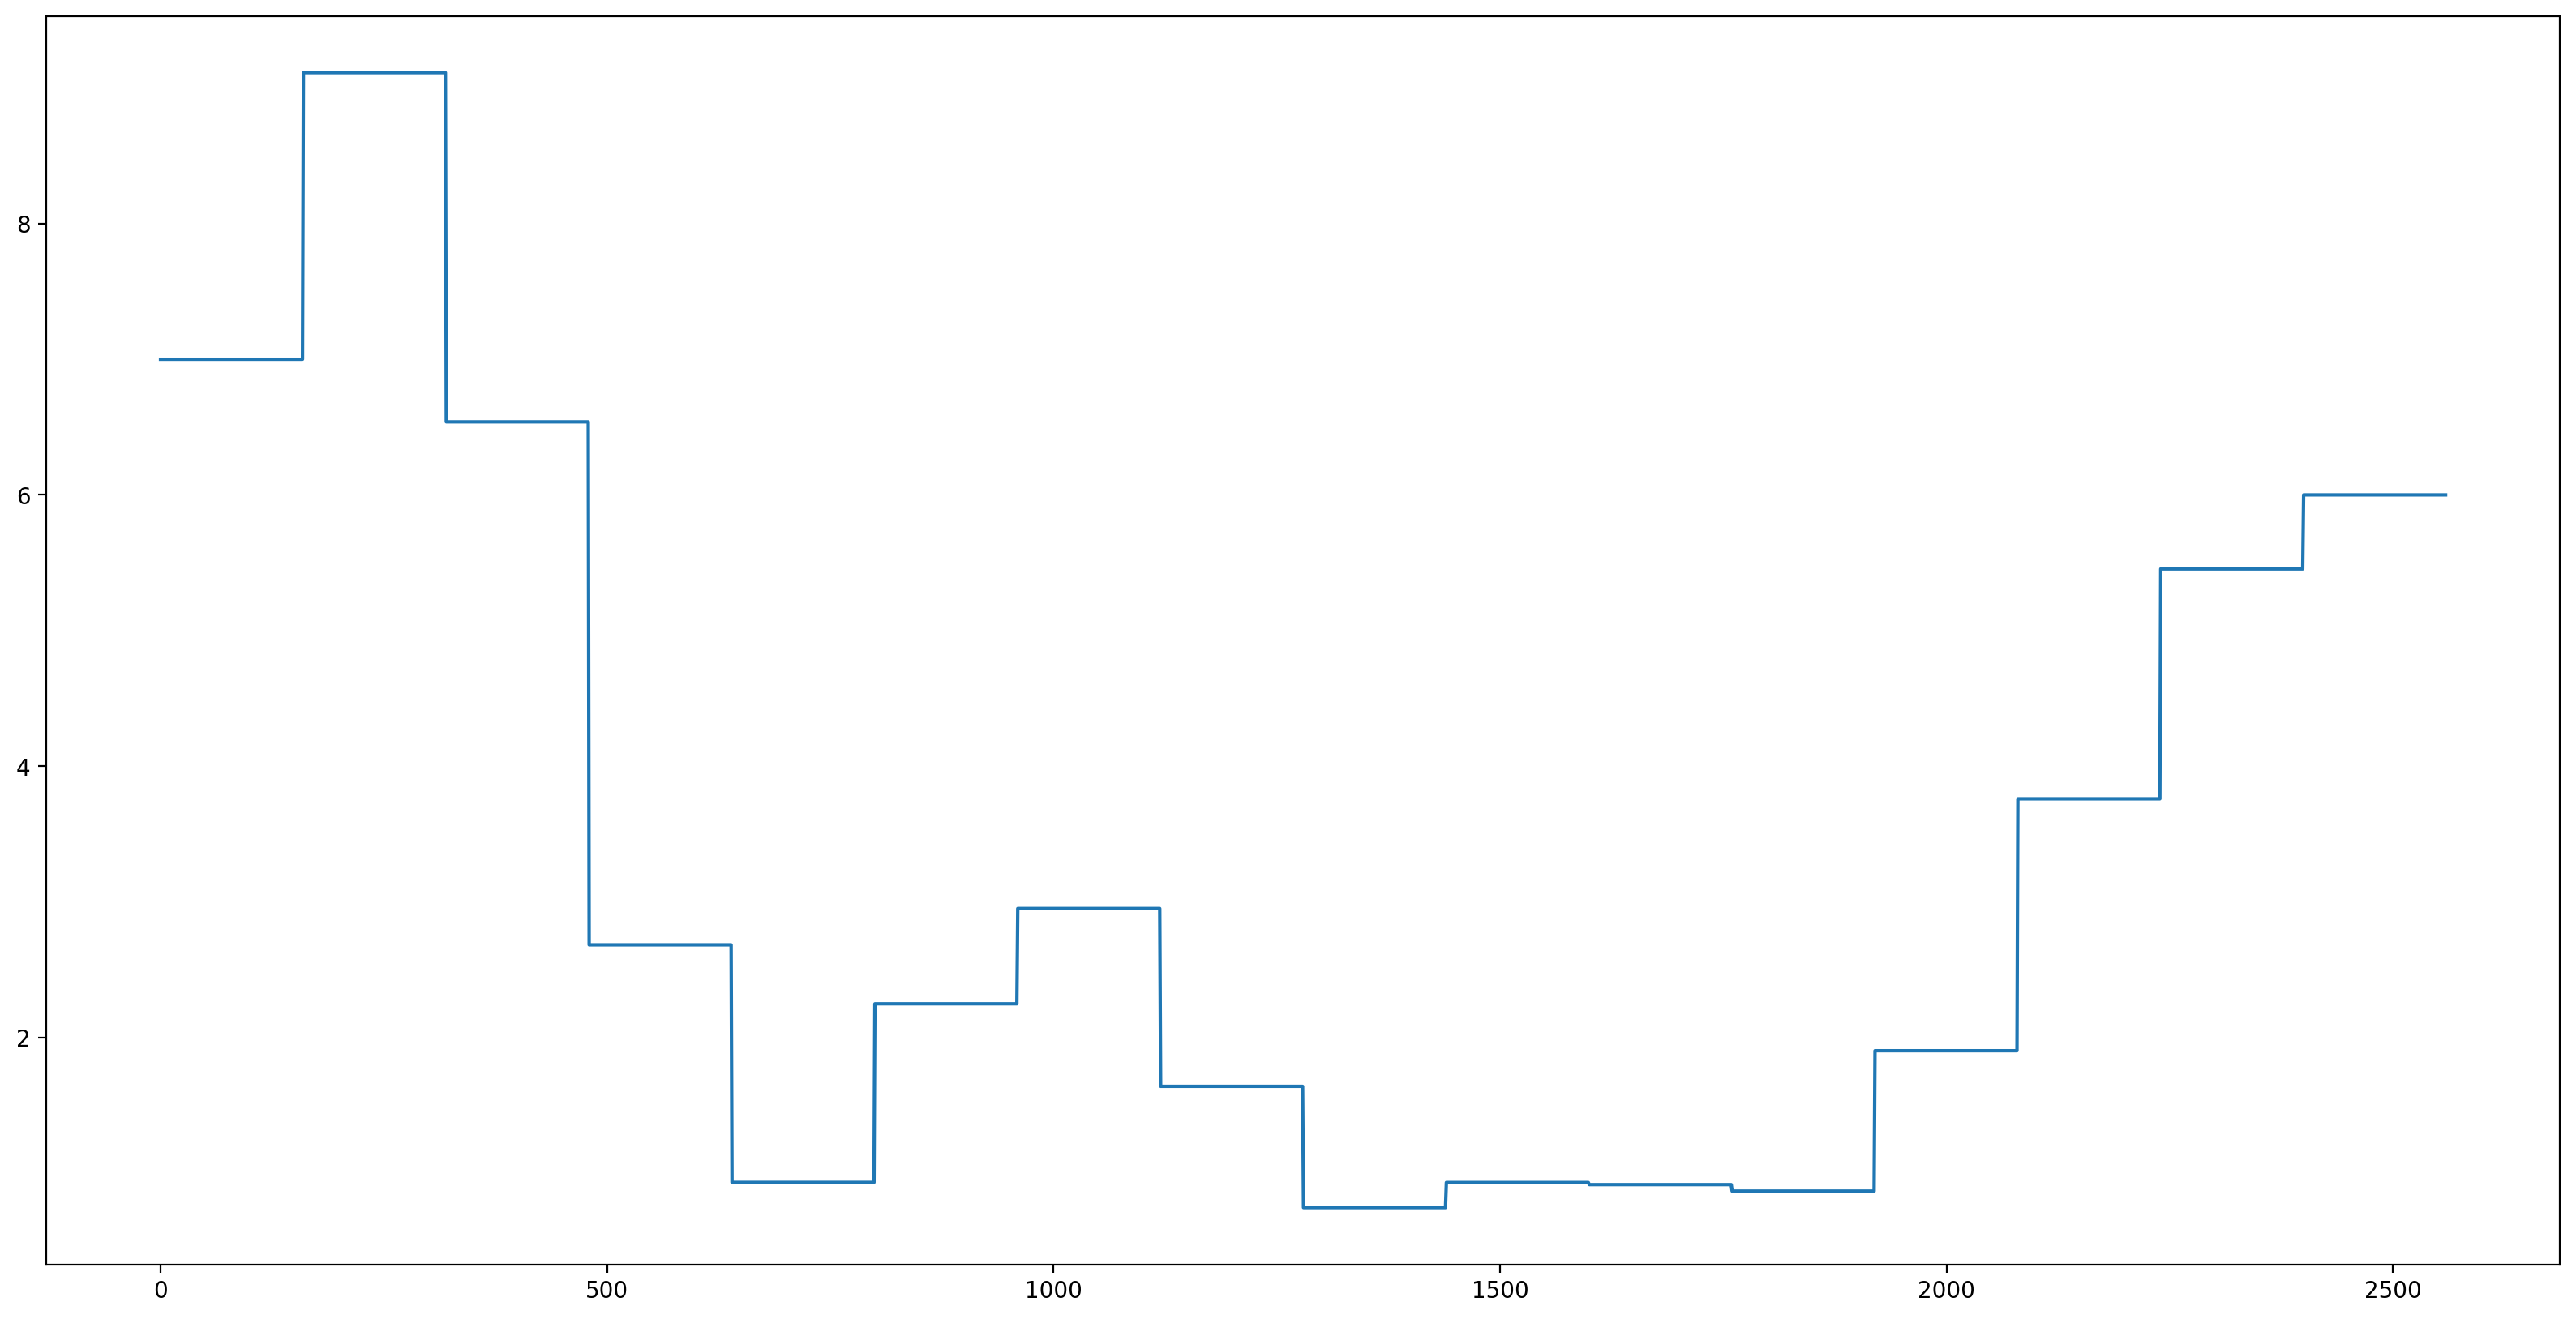

In [17]:
print(f'{density_function.shape = }')
sustain = 16
for density in density_function:
    print(f'{density = }')
    volume_array = dmu.build_density_function(density, 256 // sustain)
    # volume_array = np.repeat(volume_array, 10 * sustain, axis = 0 )
    volume_array = np.clip(np.repeat(volume_array, 10 * sustain, axis = 0),0,10)
    print(f'{volume_array.shape = }')
    X = np.arange(0, volume_array.shape[0], 1)
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(X, volume_array)
    plt.show()
    break

In [27]:
limit_for_diamond = 11
print(f'{limit_for_diamond = }')
small_diamond = np.array(dmu.build_all_ratios(limit_for_diamond))
print(f'{small_diamond.shape = }')
limit_dims = np.sqrt(small_diamond.shape[0],).astype(int)
print(f'{limit_dims = }')
unique_ratios = np.unique(small_diamond)
print(f'{unique_ratios.shape = }')
diamond_array = np.array([atu.stringify(ratio) for ratio in small_diamond]).reshape(-1,limit_dims)
print(*diamond_array, sep = '\n')


limit_for_diamond = 11
small_diamond.shape = (36,)
limit_dims = 6
unique_ratios.shape = (29,)
['1/1' '7/6' '4/3' '3/2' '5/3' '11/6']
['12/7' '1/1' '8/7' '9/7' '10/7' '11/7']
['3/2' '7/4' '1/1' '9/8' '5/4' '11/8']
['4/3' '14/9' '16/9' '1/1' '10/9' '11/9']
['6/5' '7/5' '8/5' '9/5' '1/1' '11/10']
['12/11' '14/11' '16/11' '18/11' '20/11' '1/1']


In [ ]:
# cache only works with hashable elements: int, float, decimal, complex, bool, string, tuple, range, frozenset, bytes. But not numpy arrays.
from functools import cache
@cache
def afactorial(n):
    return n * afactorial(n-1) if n else 1

%time print(f'{afactorial(25) = }')
%time print(f'{afactorial(15) = }')
%time print(f'{afactorial(5) = }')
# CPU times: user 7 µs, sys: 0 ns, total: 7 µs
# CPU times: user 6 µs, sys: 5 µs, total: 11 µs
# CPU times: user 3 µs, sys: 3 µs, total: 6 µs

In [35]:
a = (1,2,3,4,5,6)
print(f'{a.__hash__() = }')

a.__hash__() = 5881802312257552497
